# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import open_weather_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [20]:
cities

['new norfolk',
 'kapaa',
 'alappuzha',
 'rikitea',
 'terney',
 'parabel',
 'dikson',
 'meulaboh',
 'ushuaia',
 'sabae',
 'albany',
 'eenhana',
 'halalo',
 'saint-georges',
 'port alfred',
 'jamestown',
 'beira',
 'oriximina',
 'avarua',
 'barentsburg',
 'sao felix do xingu',
 'barrow',
 'morant bay',
 'havelock',
 'hermanus',
 'butaritari',
 'dovolnoye',
 'diffa',
 'tiznit',
 'ouranopolis',
 'esperance',
 'tuktoyaktuk',
 'sturgeon bay',
 'nikolskoye',
 'mount gambier',
 'cape town',
 'atbasar',
 'nisia floresta',
 'codrington',
 'saleaula',
 'caibarien',
 'grand river south east',
 'belushya guba',
 'port keats',
 'katangli',
 'tumpat',
 'ponta do sol',
 'arraial do cabo',
 'winnemucca',
 'thompson',
 'attawapiskat',
 'chuy',
 'palabuhanratu',
 'betanzos',
 'tezu',
 'antofagasta',
 'ilulissat',
 'vaini',
 'ancud',
 'illoqqortoormiut',
 'mataura',
 'hamilton',
 'del rio',
 'pevek',
 'qaanaaq',
 'ahipara',
 'chokurdakh',
 'insar',
 'lebu',
 'maceio',
 'georgetown',
 'mahebourg',
 'oksfj

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={open_weather_API_key}&units={units}&q="
#print(requests.get(query_url + "London").json(),indent=4, sort_keys=True)
requests.get(query_url + "vikhorevka").json()

{'coord': {'lon': 101.16, 'lat': 56.12},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 12.2,
  'feels_like': 3.92,
  'temp_min': 12.2,
  'temp_max': 12.2,
  'pressure': 1002,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 4.47, 'deg': 130},
 'clouds': {'all': 40},
 'dt': 1579337944,
 'sys': {'type': 1,
  'id': 8892,
  'country': 'RU',
  'sunrise': 1579311280,
  'sunset': 1579338952},
 'timezone': 28800,
 'id': 2013399,
 'name': 'Vikhorevka',
 'cod': 200}

In [49]:

# set up lists to hold reponse info
lat =[]
temp = []
humidity = []
cloudiness = []
windspeed = []
foundcity = []
    

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        print(f"Found lat for {city}, appending stats")
        temp.append(response["main"]["temp"])
        print(f"Found temp for {city}, appending stats")
        humidity.append(response['main']['humidity'])
        print(f"Found humidity for {city}, appending stats")
        cloudiness.append(response['clouds']['all'])
        print(f"Found cloudiness for {city}, appending stats")
        windspeed.append(response['wind']['speed'])
        print(f"Found windspeed for {city}, appending stats")
        foundcity.append(response['name'])
        print(f"appending city")
    except:
        print(f"{city} not found")
        pass

Found lat for new norfolk, appending stats
Found temp for new norfolk, appending stats
Found humidity for new norfolk, appending stats
Found cloudiness for new norfolk, appending stats
Found windspeed for new norfolk, appending stats
appending city
Found lat for kapaa, appending stats
Found temp for kapaa, appending stats
Found humidity for kapaa, appending stats
Found cloudiness for kapaa, appending stats
Found windspeed for kapaa, appending stats
appending city
Found lat for alappuzha, appending stats
Found temp for alappuzha, appending stats
Found humidity for alappuzha, appending stats
Found cloudiness for alappuzha, appending stats
Found windspeed for alappuzha, appending stats
appending city
Found lat for rikitea, appending stats
Found temp for rikitea, appending stats
Found humidity for rikitea, appending stats
Found cloudiness for rikitea, appending stats
Found windspeed for rikitea, appending stats
appending city
Found lat for terney, appending stats
Found temp for terney, app

Found lat for codrington, appending stats
Found temp for codrington, appending stats
Found humidity for codrington, appending stats
Found cloudiness for codrington, appending stats
Found windspeed for codrington, appending stats
appending city
saleaula not found
Found lat for caibarien, appending stats
Found temp for caibarien, appending stats
Found humidity for caibarien, appending stats
Found cloudiness for caibarien, appending stats
Found windspeed for caibarien, appending stats
appending city
grand river south east not found
belushya guba not found
Found lat for port keats, appending stats
Found temp for port keats, appending stats
Found humidity for port keats, appending stats
Found cloudiness for port keats, appending stats
Found windspeed for port keats, appending stats
appending city
Found lat for katangli, appending stats
Found temp for katangli, appending stats
Found humidity for katangli, appending stats
Found cloudiness for katangli, appending stats
Found windspeed for kata

Found lat for palmer, appending stats
Found temp for palmer, appending stats
Found humidity for palmer, appending stats
Found cloudiness for palmer, appending stats
Found windspeed for palmer, appending stats
appending city
Found lat for busselton, appending stats
Found temp for busselton, appending stats
Found humidity for busselton, appending stats
Found cloudiness for busselton, appending stats
Found windspeed for busselton, appending stats
appending city
taolanaro not found
Found lat for portsmouth, appending stats
Found temp for portsmouth, appending stats
Found humidity for portsmouth, appending stats
Found cloudiness for portsmouth, appending stats
Found windspeed for portsmouth, appending stats
appending city
Found lat for batagay, appending stats
Found temp for batagay, appending stats
Found humidity for batagay, appending stats
Found cloudiness for batagay, appending stats
Found windspeed for batagay, appending stats
appending city
Found lat for punta arenas, appending stats


lolua not found
Found lat for port hardy, appending stats
Found temp for port hardy, appending stats
Found humidity for port hardy, appending stats
Found cloudiness for port hardy, appending stats
Found windspeed for port hardy, appending stats
appending city
Found lat for carire, appending stats
Found temp for carire, appending stats
Found humidity for carire, appending stats
Found cloudiness for carire, appending stats
Found windspeed for carire, appending stats
appending city
Found lat for kamina, appending stats
Found temp for kamina, appending stats
Found humidity for kamina, appending stats
Found cloudiness for kamina, appending stats
Found windspeed for kamina, appending stats
appending city
Found lat for vila velha, appending stats
Found temp for vila velha, appending stats
Found humidity for vila velha, appending stats
Found cloudiness for vila velha, appending stats
Found windspeed for vila velha, appending stats
appending city
Found lat for padang, appending stats
Found temp

vaitupu not found
Found lat for bubaque, appending stats
Found temp for bubaque, appending stats
Found humidity for bubaque, appending stats
Found cloudiness for bubaque, appending stats
Found windspeed for bubaque, appending stats
appending city
Found lat for gorgan, appending stats
Found temp for gorgan, appending stats
Found humidity for gorgan, appending stats
Found cloudiness for gorgan, appending stats
Found windspeed for gorgan, appending stats
appending city
Found lat for killybegs, appending stats
Found temp for killybegs, appending stats
Found humidity for killybegs, appending stats
Found cloudiness for killybegs, appending stats
Found windspeed for killybegs, appending stats
appending city
Found lat for saint-pierre, appending stats
Found temp for saint-pierre, appending stats
Found humidity for saint-pierre, appending stats
Found cloudiness for saint-pierre, appending stats
Found windspeed for saint-pierre, appending stats
appending city
Found lat for kuruman, appending sta

Found lat for lagoa, appending stats
Found temp for lagoa, appending stats
Found humidity for lagoa, appending stats
Found cloudiness for lagoa, appending stats
Found windspeed for lagoa, appending stats
appending city
Found lat for bethel, appending stats
Found temp for bethel, appending stats
Found humidity for bethel, appending stats
Found cloudiness for bethel, appending stats
Found windspeed for bethel, appending stats
appending city
nizhneyansk not found
Found lat for jabinyanah, appending stats
Found temp for jabinyanah, appending stats
Found humidity for jabinyanah, appending stats
Found cloudiness for jabinyanah, appending stats
Found windspeed for jabinyanah, appending stats
appending city
Found lat for wagar, appending stats
Found temp for wagar, appending stats
Found humidity for wagar, appending stats
Found cloudiness for wagar, appending stats
Found windspeed for wagar, appending stats
appending city
Found lat for coquimbo, appending stats
Found temp for coquimbo, appendi

Found lat for languyan, appending stats
Found temp for languyan, appending stats
Found humidity for languyan, appending stats
Found cloudiness for languyan, appending stats
Found windspeed for languyan, appending stats
appending city
Found lat for upata, appending stats
Found temp for upata, appending stats
Found humidity for upata, appending stats
Found cloudiness for upata, appending stats
Found windspeed for upata, appending stats
appending city
Found lat for ulladulla, appending stats
Found temp for ulladulla, appending stats
Found humidity for ulladulla, appending stats
Found cloudiness for ulladulla, appending stats
Found windspeed for ulladulla, appending stats
appending city
Found lat for semnan, appending stats
Found temp for semnan, appending stats
Found humidity for semnan, appending stats
Found cloudiness for semnan, appending stats
Found windspeed for semnan, appending stats
appending city
Found lat for nantucket, appending stats
Found temp for nantucket, appending stats
F

Found lat for port macquarie, appending stats
Found temp for port macquarie, appending stats
Found humidity for port macquarie, appending stats
Found cloudiness for port macquarie, appending stats
Found windspeed for port macquarie, appending stats
appending city
Found lat for harsewinkel, appending stats
Found temp for harsewinkel, appending stats
Found humidity for harsewinkel, appending stats
Found cloudiness for harsewinkel, appending stats
Found windspeed for harsewinkel, appending stats
appending city
Found lat for arona, appending stats
Found temp for arona, appending stats
Found humidity for arona, appending stats
Found cloudiness for arona, appending stats
Found windspeed for arona, appending stats
appending city
rungata not found
Found lat for rocha, appending stats
Found temp for rocha, appending stats
Found humidity for rocha, appending stats
Found cloudiness for rocha, appending stats
Found windspeed for rocha, appending stats
appending city
Found lat for aranos, appending

Found lat for valdez, appending stats
Found temp for valdez, appending stats
Found humidity for valdez, appending stats
Found cloudiness for valdez, appending stats
Found windspeed for valdez, appending stats
appending city
Found lat for basti, appending stats
Found temp for basti, appending stats
Found humidity for basti, appending stats
Found cloudiness for basti, appending stats
Found windspeed for basti, appending stats
appending city
Found lat for yining, appending stats
Found temp for yining, appending stats
Found humidity for yining, appending stats
Found cloudiness for yining, appending stats
Found windspeed for yining, appending stats
appending city
Found lat for san quintin, appending stats
Found temp for san quintin, appending stats
Found humidity for san quintin, appending stats
Found cloudiness for san quintin, appending stats
Found windspeed for san quintin, appending stats
appending city
Found lat for wertheim, appending stats
Found temp for wertheim, appending stats
Fou

Found lat for amalapuram, appending stats
Found temp for amalapuram, appending stats
Found humidity for amalapuram, appending stats
Found cloudiness for amalapuram, appending stats
Found windspeed for amalapuram, appending stats
appending city
Found lat for pacific grove, appending stats
Found temp for pacific grove, appending stats
Found humidity for pacific grove, appending stats
Found cloudiness for pacific grove, appending stats
Found windspeed for pacific grove, appending stats
appending city
Found lat for gamboma, appending stats
Found temp for gamboma, appending stats
Found humidity for gamboma, appending stats
Found cloudiness for gamboma, appending stats
Found windspeed for gamboma, appending stats
appending city
Found lat for brigantine, appending stats
Found temp for brigantine, appending stats
Found humidity for brigantine, appending stats
Found cloudiness for brigantine, appending stats
Found windspeed for brigantine, appending stats
appending city
Found lat for price, app

Found lat for vila franca do campo, appending stats
Found temp for vila franca do campo, appending stats
Found humidity for vila franca do campo, appending stats
Found cloudiness for vila franca do campo, appending stats
Found windspeed for vila franca do campo, appending stats
appending city
Found lat for mogadishu, appending stats
Found temp for mogadishu, appending stats
Found humidity for mogadishu, appending stats
Found cloudiness for mogadishu, appending stats
Found windspeed for mogadishu, appending stats
appending city
Found lat for cananeia, appending stats
Found temp for cananeia, appending stats
Found humidity for cananeia, appending stats
Found cloudiness for cananeia, appending stats
Found windspeed for cananeia, appending stats
appending city
Found lat for kovernino, appending stats
Found temp for kovernino, appending stats
Found humidity for kovernino, appending stats
Found cloudiness for kovernino, appending stats
Found windspeed for kovernino, appending stats
appending

Found lat for amapa, appending stats
Found temp for amapa, appending stats
Found humidity for amapa, appending stats
Found cloudiness for amapa, appending stats
Found windspeed for amapa, appending stats
appending city
Found lat for noshiro, appending stats
Found temp for noshiro, appending stats
Found humidity for noshiro, appending stats
Found cloudiness for noshiro, appending stats
Found windspeed for noshiro, appending stats
appending city
Found lat for sindhnur, appending stats
Found temp for sindhnur, appending stats
Found humidity for sindhnur, appending stats
Found cloudiness for sindhnur, appending stats
Found windspeed for sindhnur, appending stats
appending city
Found lat for pangnirtung, appending stats
Found temp for pangnirtung, appending stats
Found humidity for pangnirtung, appending stats
Found cloudiness for pangnirtung, appending stats
Found windspeed for pangnirtung, appending stats
appending city
Found lat for grindavik, appending stats
Found temp for grindavik, ap

Found lat for flinders, appending stats
Found temp for flinders, appending stats
Found humidity for flinders, appending stats
Found cloudiness for flinders, appending stats
Found windspeed for flinders, appending stats
appending city
Found lat for acari, appending stats
Found temp for acari, appending stats
Found humidity for acari, appending stats
Found cloudiness for acari, appending stats
Found windspeed for acari, appending stats
appending city
Found lat for bella union, appending stats
Found temp for bella union, appending stats
Found humidity for bella union, appending stats
Found cloudiness for bella union, appending stats
Found windspeed for bella union, appending stats
appending city
Found lat for chake chake, appending stats
Found temp for chake chake, appending stats
Found humidity for chake chake, appending stats
Found cloudiness for chake chake, appending stats
Found windspeed for chake chake, appending stats
appending city
Found lat for dvinskoy, appending stats
Found tem

Found lat for sterling, appending stats
Found temp for sterling, appending stats
Found humidity for sterling, appending stats
Found cloudiness for sterling, appending stats
Found windspeed for sterling, appending stats
appending city
Found lat for zhigansk, appending stats
Found temp for zhigansk, appending stats
Found humidity for zhigansk, appending stats
Found cloudiness for zhigansk, appending stats
Found windspeed for zhigansk, appending stats
appending city
Found lat for hilton head island, appending stats
Found temp for hilton head island, appending stats
Found humidity for hilton head island, appending stats
Found cloudiness for hilton head island, appending stats
Found windspeed for hilton head island, appending stats
appending city
Found lat for marsa matruh, appending stats
Found temp for marsa matruh, appending stats
Found humidity for marsa matruh, appending stats
Found cloudiness for marsa matruh, appending stats
Found windspeed for marsa matruh, appending stats
appending

Found lat for broken hill, appending stats
Found temp for broken hill, appending stats
Found humidity for broken hill, appending stats
Found cloudiness for broken hill, appending stats
Found windspeed for broken hill, appending stats
appending city
Found lat for inuvik, appending stats
Found temp for inuvik, appending stats
Found humidity for inuvik, appending stats
Found cloudiness for inuvik, appending stats
Found windspeed for inuvik, appending stats
appending city
Found lat for warrnambool, appending stats
Found temp for warrnambool, appending stats
Found humidity for warrnambool, appending stats
Found cloudiness for warrnambool, appending stats
Found windspeed for warrnambool, appending stats
appending city
Found lat for tateyama, appending stats
Found temp for tateyama, appending stats
Found humidity for tateyama, appending stats
Found cloudiness for tateyama, appending stats
Found windspeed for tateyama, appending stats
appending city
Found lat for beyla, appending stats
Found t

Found lat for vikhorevka, appending stats
Found temp for vikhorevka, appending stats
Found humidity for vikhorevka, appending stats
Found cloudiness for vikhorevka, appending stats
Found windspeed for vikhorevka, appending stats
appending city
Found lat for vanino, appending stats
Found temp for vanino, appending stats
Found humidity for vanino, appending stats
Found cloudiness for vanino, appending stats
Found windspeed for vanino, appending stats
appending city
Found lat for ewa beach, appending stats
Found temp for ewa beach, appending stats
Found humidity for ewa beach, appending stats
Found cloudiness for ewa beach, appending stats
Found windspeed for ewa beach, appending stats
appending city
Found lat for nemuro, appending stats
Found temp for nemuro, appending stats
Found humidity for nemuro, appending stats
Found cloudiness for nemuro, appending stats
Found windspeed for nemuro, appending stats
appending city
Found lat for luorong, appending stats
Found temp for luorong, append

In [50]:
weather_data = pd.DataFrame({
    "City": foundcity,
    "Latitude":lat,
    "Temperature (F)":temp,
    "Humidity (%)":humidity,
    "Windspeed (mph)":windspeed,
    "Cloudiness (%)":cloudiness
})
weather_data.head()

,City,Latitude,Temperature (F),Humidity (%),Windspeed (mph),Cloudiness (%)
0,New Norfolk,-42.78,58.66,51,11.41,20
1,Kapaa,22.08,68.72,64,27.51,90
2,Alappuzha,9.49,89.73,51,8.25,61
3,Rikitea,-23.12,78.08,83,16.80,20
4,Terney,45.05,15.62,74,3.56,100


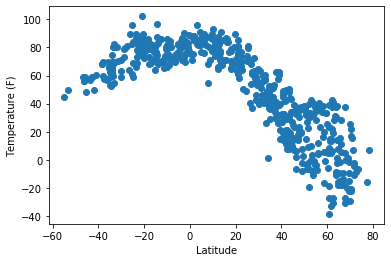

In [58]:
#Plotting Temperature (F) vs. Latitude, analyzing the Temperature (F) of cities over a range of latitude
# As we go away from the equator, the temperature is lower toward the northern hemisphere at this time of the year and warmer in the southern hemisphere during this time.
plt.scatter(weather_data['Latitude'],weather_data['Temperature (F)'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("Temperature (F) vs Latitude.png")
plt.show()

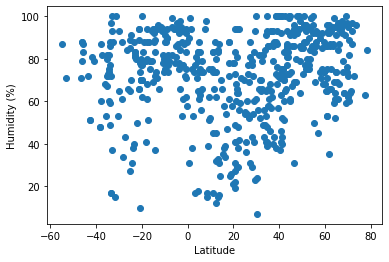

In [59]:
#Plotting Humidity (%) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Humidity (%)'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Humidity (%) vs Latitude.png")
plt.show()

#There is no correlation between humidity and latitudes of different cities around the world at this time of the year

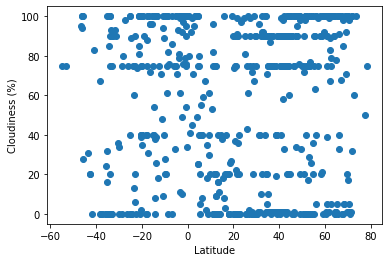

In [60]:
#Plotting Cloudiness (%) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness (%)'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Cloudiness (%) vs Latitude.png")
plt.show()

#no conclusion/suggestion based on data comparing cloudiness of different cities in different latitudes.

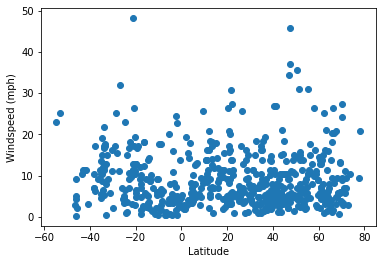

In [61]:
#Plotting Wind Speed (mph) vs. Latitude
plt.scatter(weather_data['Latitude'],weather_data['Windspeed (mph)'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.savefig("Windspeed (mph) vs Latitude.png")
plt.show()
#no conclusion/suggestion based on data comparing windspeed of different cities in different latitudes.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression